In [1]:
# Author    : David Darigan
# ID        : C00263218

Changelog

The following changes are listed from earliest to latest in descending order.

-----------
- Import SVC (Support Vector Machine) from sklearn SVM
-----------
- Import Data
-----------
- Split Data into training/testing sets
-----------
- SVMs cannot use categorical data directly, requires encoding
-----------
- Use pd.get_dummies to encode category variables into numeric values
-----------
- Ran an accuracy score check and found 0.68% accuracy, a little low.
-----------
- Changing random state to 20 brings accuracy to 0.77%, (21 and 19 are both significantly lower)
-----------
- Attempted to add Confusion Matrix but labels/data are wrong
----------
- Seperate cells into phases according to CRISP-DM
----------
- Reorganized cells according to the steps of the CRISP-DM process

In [ ]:
# CRISP-DM Steps

# Business Understanding
# Data Understanding
# Data Preparation
# Modelling
# Evaluation
# Deployment

In [ ]:
%pip install scikit-learn
%pip install matplotlib
%pip install --upgrade --force-reinstall pillow
%pip install plotly

In [12]:
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import joblib
import plotly.figure_factory as ff


import pandas as pd

In [ ]:
# Business Understanding

In [ ]:
# Data Understanding

In [ ]:
# Data Preparation
data = pd.read_csv("heart.csv")
data = pd.get_dummies(data, drop_first=True) # Converting to numerical encodings (e.g sex: m = 0, f = 1)

y = data['HeartDisease']
X = data.drop('HeartDisease', axis=1) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [ ]:
# Modelling
svm_model = SVC(kernel='rbf', random_state=20) 
classifier = svm_model.fit(X_train, y_train)
predictions = svm_model.predict(X_test)

In [ ]:
# Evaluation
accuracy = accuracy_score(y_test, predictions)
classification_report = classification_report(y_test, predictions)
print("Accuracy:", accuracy)
print("Classification Report:", classification_report)

In [ ]:
# Deployment

# joblib.dump(<MODEL>, '<NAME>.pkl')

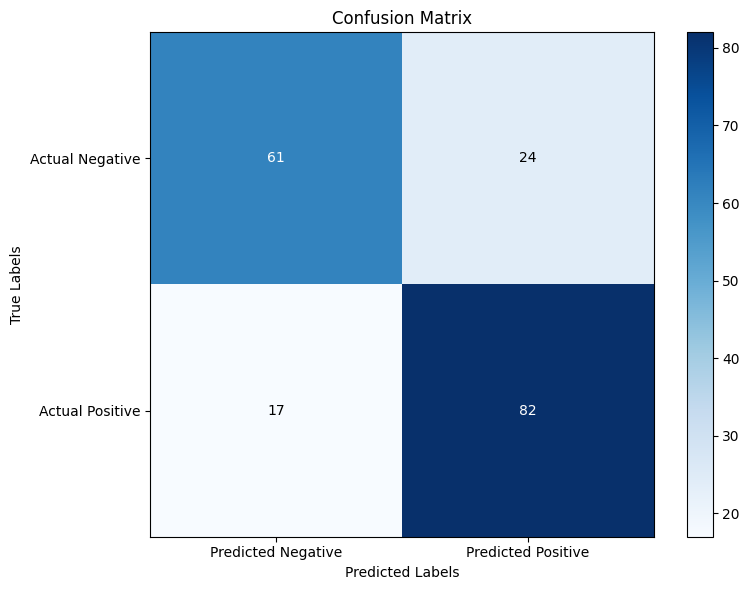

In [ ]:
# NOTE: MOVE TO EVALUATION CELLS

# Plot Confusion Matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Predicted Negative', 'Predicted Positive'])
plt.yticks([0, 1], ['Actual Negative', 'Actual Positive'])

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()

plt.show()